# Import

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal
from scipy.optimize import curve_fit
import scipy.fftpack
import matplotlib.colors as colors

# Read data

In [2]:
Rl = 40; N=64
#common_folder = "/home/gorbunov8a/CODE/test_case/"
common_folder = "/home/gorbunov8a/data/correlations/rl160_N512/time_series/"
filetype = "vel_time_series_point"

for point_index in range(0,10) :
    file = common_folder + filetype + "%03d" % (point_index+1) + ".table"
    print(file)
    file_array = []
    file_list = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_list.append(temp_array_line)
    file_array = np.array(file_list[0:-1])
    if (point_index == 0) :
        t = file_array[:,0]
        vel_data = [file_array[:,1:]]
        length = len(t)
    else : 
        vel_data = np.append(vel_data, [file_array[:length,1:]], axis=0)     

/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point001.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point002.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point003.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point004.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point005.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point006.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point007.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point008.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point009.table
/home/gorbunov8a/data/correlations/rl160_N512/time_series/vel_time_series_point010.table


# Parameters

In [3]:
Urms = 0.59770684E-02
L = 2.69

In [4]:
Urms = 0.10283328
L = 2.05

In [5]:
t0 = L/Urms

Recording length :

In [6]:
t[-1]/t0

3.511129479804879

# Basic statistics

Means :

In [7]:
for index_point in range(len(vel_data)) :
    print(np.mean(vel_data[index_point][:,0]))

-0.005038893210471424
-0.02584040799036714
0.09705667552427859
0.03736651236111429
0.03689764721641857
0.0018699460694571429
0.05637697160242992
-0.010092793738842854
0.04099877466467857
-0.01385599266527143


In [8]:
for index_point in range(len(vel_data)) :
    print(np.std(vel_data[index_point][:,0]/np.mean(vel_data[index_point][:,0])))

15.96579558439947
3.577990095298411
0.8028757981053883
1.9568859035112476
2.853850310948022
53.02118186550137
1.7016598762688597
6.2693690196641985
1.7552787149573756
7.984881946366193


In [9]:
vel_norms = np.zeros((len(vel_data), len(t)))
for index_point in range(len(vel_data)) :
    vel_norms[index_point,:] = np.sqrt(vel_data[index_point][:,0]**2 + vel_data[index_point][:,1]**2 + vel_data[index_point][:,2]**2)

# Time series

In [10]:
len(vel_data)

10

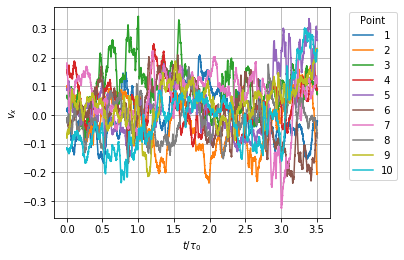

In [11]:
point = 1
component = 0

fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
for index_point in range(len(vel_data)) :
    ax.plot(t/t0, vel_data[index_point][:,component], label='%2.0f' % (index_point+1))
ax.set(xlabel=r'$t/\tau_0$', ylabel=r'$v_x$'); ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Point')
plt.show()

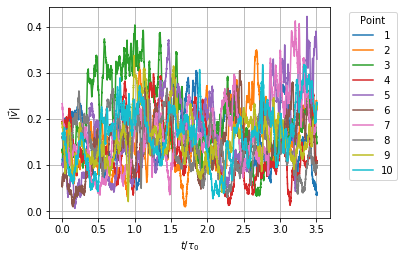

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
for index_point in range(len(vel_data)) :
    ax.plot(t/t0, vel_norms[index_point,:], label='%2.0f' % (index_point+1))
ax.set(xlabel=r'$t/\tau_0$', ylabel=r'$|\vec{v}|$'); ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Point')
plt.show()

# Autocorrelation

In [13]:
dt = t[1] - t[0]
lags = np.array(range(-len(t)+1,len(t)))*dt
autocorrelation = np.ndarray(shape=(len(vel_data), len(lags)))

In [14]:
for index_point in range(len(vel_data)) :
    autocorrelation[index_point,:] = signal.correlate(vel_data[index_point][:,0], vel_data[index_point][:,0], mode='full', method='fft')
    #autocorrelation[index_point,:] = signal.correlate(vel_data[index_point][:,0], vel_data[index_point][:,0], mode='full', method='direct')

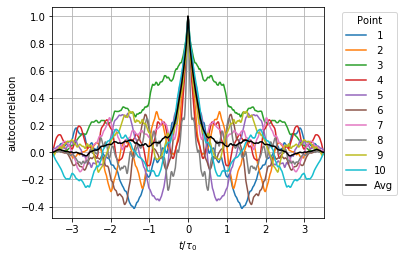

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
for index_point in range(len(vel_data)) :
    ax.plot(lags/t0, autocorrelation[index_point,:]/autocorrelation[index_point,len(lags)//2], label='%2.0f' % (index_point+1))
ax.plot(lags/t0, np.mean(autocorrelation, axis=0)/np.mean(autocorrelation, axis=0)[len(lags)//2], 'k-', label='Avg')
ax.set(xlabel=r'$t/\tau_0$', ylabel='autocorrelation'); ax.grid()
xmax = 3.5
ax.set(xlim=[-xmax,xmax])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Point')
plt.show()

In [16]:
autocorrelation_of_norms = np.ndarray(shape=(len(vel_data), 2*len(t)-1))
for index_point in range(len(vel_data)) :
    autocorrelation_of_norms[index_point,:] = signal.correlate(vel_norms[index_point,:]-np.mean(vel_norms[index_point,:]), vel_norms[index_point,:]-np.mean(vel_norms[index_point,:]), \
                                                               mode='full', method='fft')

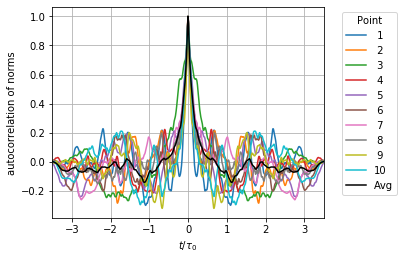

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
for index_point in range(len(vel_data)) :
    ax.plot(lags/t0, autocorrelation_of_norms[index_point,:]/autocorrelation_of_norms[index_point,len(t)], label='%2.0f' % (index_point+1))
ax.plot(lags/t0, np.mean(autocorrelation_of_norms, axis=0)/np.mean(autocorrelation_of_norms, axis=0)[len(t)], 'k-', label='Avg')
ax.set(xlabel=r'$t/\tau_0$', ylabel='autocorrelation of norms'); ax.grid()
ax.set(xlim=[-xmax,xmax])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Point')
plt.show()

# Time spectra

Sampling frequency $f_s = 1/\Delta t$

In [18]:
fs = (len(t)-1)/t[-1]
print(fs)

200.0


In [19]:
nperseg = 128

In [20]:
f, psd_test= signal.welch(vel_data[0][:,0], fs, nperseg=nperseg)

In [21]:
#psd = np.ndarray(shape=(len(vel_data), 3, len(f)))
psd = np.ndarray(shape=(len(vel_data), 3, len(f)))

In [22]:
for index_point in range(len(vel_data)) :
    #for ic in list(range(0,3)) :
    f, psd[index_point,:] = signal.welch(vel_data[index_point][:,0], fs, nperseg=nperseg, average='mean', detrend='constant', scaling='density')

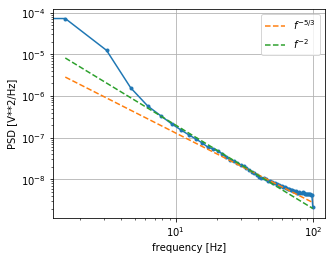

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4.5,3.5))
ax.plot(f, np.mean(psd,axis=(0,1)), '.-')
ax.plot(f[1:],6e-6*f[1:]**(-5.0/3.0), '--', label=r'$f^{-5/3}$')
ax.plot(f[1:],2e-5*f[1:]**(-2.0), '--', label=r'$f^{-2}$')
ax.set(xlabel='frequency [Hz]', ylabel='PSD [V**2/Hz]', xscale='log', yscale='log'); ax.grid()
ax.legend()
plt.show()

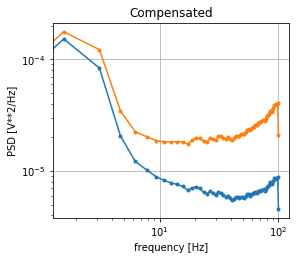

In [28]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4,3.5))

ax.plot(f, np.mean(psd,axis=(0,1))*f**(5.0/3.0), '.-', label=r'$E(f) f^{5/3}$')
ax.plot(f, np.mean(psd,axis=(0,1))*f**(2.0), '.-', label=r'$E(f) f^{1}$')

ax.set(title=r'Compensated',xlabel='frequency [Hz]', ylabel='PSD [V**2/Hz]', xscale='log', yscale='log'); ax.grid()

plt.show()

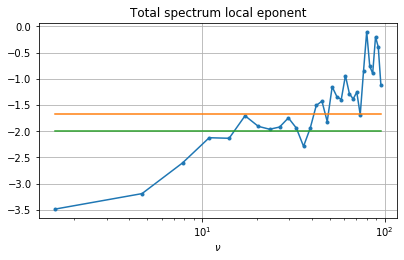

In [25]:
# check the slope of the time spectrum
resampling = 2
x = np.log(f[1::resampling])
y = np.log(np.mean(psd,axis=(0,1))[1::resampling])
slope = np.gradient(y, x)

fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
ax.plot(np.exp(x[:-1:]), slope[:-1:], '.-')
ax.plot(np.exp(x[:-1:]), -5/3*np.ones_like(x[:-1:]), '-')
ax.plot(np.exp(x[:-1:]), -2*np.ones_like(x[:-1:]), '-')
ax.set(xlabel=r'$\nu$', xscale='log', title='Total spectrum local eponent'); ax.grid()
plt.show()